In [2]:
from IPython.html.services.config import ConfigManager
from IPython.utils.path import locate_profile
cm = ConfigManager(profile_dir=locate_profile(get_ipython().profile))
cm.update('livereveal', {
              'theme': 'sky',
              'transition': 'zoom',
              'start_slideshow_at': 'selected',
})


{u'start_slideshow_at': 'selected', u'theme': 'sky', u'transition': 'zoom'}

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xkcd()
import seaborn as sns

#Lecture 14. Oscillatory problems

## Previous lecture 
- How we construct hierarhical approximation (nested cross approximation)
- Block Schur elimination 
- Fast direct solvers for sparse matrices


## Todays lecture
We basically have completed the "low-frequency" part.
- High-frequency boundary integral equations
- Concept of asymptotic expanstions

## Wave scattering problems

- Acoustic, elastic, electromagnetic scattering problems arise in many applications
- Applications include radar, sonar, noise barrier design
- Atmostpheric particle scattering 

##Wave problems

The time-dependent **wave equation**

$$\frac{1}{c^2} \frac{\partial^2 p}{\partial t^2} = \Delta p + \mbox{boundary conditions}.$$

$c$ is the **wave speed**. 

A typical way is to solve for the **individual frequency**:

$$p(x, t) = \int e^{i w t} p(x) dw,$$

giving the **scalar Helmholtz problem**

$$ \Delta p + k^2 p = 0, +\mbox{boundary conditions}, \quad k = \frac{w}{c}.$$

Physical meaning: **harmonic source** (1 Ghz), and it is often sufficient. 

Wideband problems exist, but are more difficult.

## Oscillations 
- The solutions to the Helmholtz equation oscillate in space with **wavelength** $\lambda = \frac{k}{2 \pi}$.

- For example, the **plane-wave** solution in 3D has the form
  $$
      p(x) = e^{i k x \hat{a}}
  $$
  and oscillates a lot!
- **Rule of thumb**: 2, 3, 6, or 10 basis functions **per wavelength**.

## Exterior problem:
Wave scattering is typically an **exterior problem**, i.e.

there is incoming wave to the scatterer.

Thus, integral equations are a good idea (**or "absorbing boundary conditions"**)

<img width=60% src='helmholtz.jpeg'>

## Anechoic chamber

It is not easy to create "free space" conditions experimentally. There is a special  [Anechoic chamber](http://en.wikipedia.org/wiki/Anechoic_chamber)  that models such free space.

<img src='Anechoic_chamber.jpg' width=70%>


## Wave modelling has many applications
<div style="float: left; width: 25%; margin-right: 5%; margin-bottom: 0.5em">
<p style="text-align:left"> Stealth technology </p>
<img width=100% src=Sukhoi_T-50_Beltyukov.jpg style="float:left">
</div>
<div style="float: left; width: 25%; margin-right: 5%; margin-bottom: 0.5em">
<p style="text-align:left"> Room acoustics </p>
<img width=100% src=stravinski.jpg style="float:left">
</div>
<div style="float: left; width: 25%; margin-right: 5%; margin-bottom: 0.5em">
<p style="text-align:left"> Internet-on-ballon, antenna design </p>
<img width=100% src=stratxx-big.png style="float:left">
</div>
<p style="clear: both;">
And many more!


## Boundary conditions 
Boundary conditions for the Helmholtz equations are important: posing incorrect B.C. gives absolutely incorrect equation!

Consider the 1D case:

$$\Delta u + k^2 u = f, \quad u(0) = 0.$$

We can put either Dirichlet or Neumann B.C. on the right side.

Using Dirichlet/Neumann we can get **resonances** (i.e., non-invertible matrices)

(3.10219730507e-11+0j)


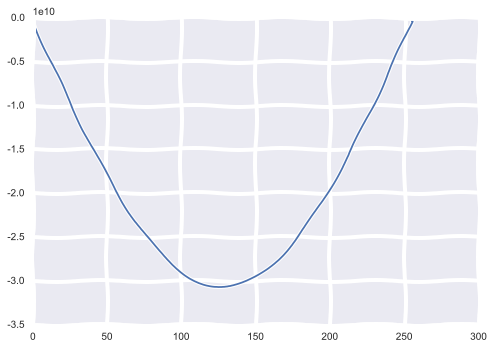

In [47]:
import numpy as np
import scipy.linalg
import tt
d = 8
n = 2 ** d
t = np.linspace(0, 1, n + 1) #Left point ommited
h = t[1] - t[0]
a = np.zeros((n, n), dtype=np.complex)
K = np.sqrt(9.79282562485+0j) #For the resonance frequency
#K = 22
M = np.zeros((n, n)) 
for i in xrange(n-1):
    a[i, i] = 2.0/h**2 - K ** 2 
    a[i, i+1] = -1.0 * (1/h**2)
    a[i+1, i] = -1.0 * (1/h**2)

a[n-1, n-1] = 2.0/h**2 - K ** 2#Dirichlet boundary conditions
#rhs = np.random.randn(n)
rhs = np.zeros(n)
#rhs[0] = 1.0
rhs = np.ones(n)
sol = np.linalg.solve(a, rhs)
#print np.min(np.linalg.eigvals(a))
plt.plot(sol.real)

The right boundary condition in this case is the so-called **Robin** boundary condition of the form  


$$u'(1) + i k \beta u(1) = 0$$

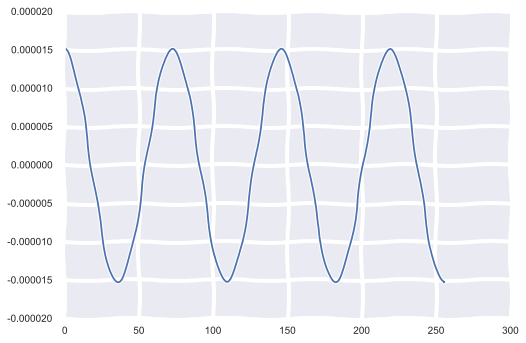

In [49]:
import numpy as np
import scipy.linalg
import tt
d = 8
n = 2 ** d
t = np.linspace(0, 1, n + 1) #Left point ommited
h = t[1] - t[0]
a = np.zeros((n, n), dtype=np.complex)
#K = np.sqrt(9.79282562485+0j) #For the resonance frequency
K = 22
M = np.zeros((n, n)) 
for i in xrange(n-1):
    a[i, i] = 2.0/h**2 - K ** 2 
    a[i, i+1] = -1.0 * (1/h**2)
    a[i+1, i] = -1.0 * (1/h**2)

a[n-1, n-1] = (1/h**2 - K ** 2) * 1.0 - 1j * K 
rhs = np.zeros(n)
rhs[0] = 1.0
sol = np.linalg.solve(a, rhs)
#print np.min(np.linalg.eigvals(a))
plt.plot(sol.real)

## Boundary conditions 
Boundary conditions for (in general) external hyperbolic problems are tough.

1. Wrong boundary conditions will lead to the "reflected waves" back into the domain
2. Exact B.C. are often **non-local**

Thus, using integral equations might be a good idea.

## Fundamental solution for the Helmholtz equation
Fundamental solution for the Helmholtz equation has the form

$$\Phi_k(x) = \begin{cases}
\frac{i}{4} H^{(1)}_0 (k \Vert x - y \Vert), \quad d = 2, \\
\frac{e^{ik \Vert x - y \Vert}}{4 \pi \Vert x - y \Vert}, \quad d = 3,
\end{cases}
$$
and $H^{(1)}_{\nu}$ is the [Hankel function of the first kind of order $\mu$](http://mathworld.wolfram.com/HankelFunctionoftheFirstKind.html) 


## Integral equation  for the Helmholtz problem
In the case of **sound-soft** scattering (i.e., Dirichlet boundary conditions of the form)

$$p_{total} = p_{ext} + p_{scat} = 0.$$

It is a good idea to use double layer potential (i.e. the unknowns are $\frac{\partial u}{\partial n})$.

$$\frac{1}{2} \frac{\partial u}{\partial n} + \int_{\Gamma} \Big( \frac{\partial \Phi_k(x, y)}{\partial n(x)} - i \eta \Phi_k(x, y) \Big)\frac{\partial u}{\partial n}(y)ds(y) = f_{k, \eta},$$

where 

$$
  f_{k, n} = \frac{\partial u^I}{\partial n}(x) - i \eta u^{I}(x).
$$

##Operator form
In the operator form we have

$$\Big(\frac{1}{2} I + D'_k  - i \eta S_k\Big) v = f_{k, \eta}.$$

This is called **combined potential equation**, and $\eta$ is the parameter.

Note, that due to the complex part, the matrix will be made always non-singular (which is not

the case in the "resonant" frequencies).

## Dependence on $k$.

If solved by standard methods, the matrices will be dense, and the number of unknowns will grow with respect to $k$. 

Also, the ranks will grow with respect to $k$, at least as $\mathcal{O}(\sqrt{k})$ in the 3D case, so the H-matrix argument will fail.

**We need something special** to get rid of $k$-dependence!

## Very high frequency
For the case of very large $k$ we get the case of **geometric optics**: we either have "shadow region" or do not have it.

However, the most interesting happens, when there is something in the "shadow region", i.e. diffraction.

However, we may use geometric optics to get the right expansion.

## Hybrid method
The hybrid method relies on the expansion

$$v(x) \approx V_0(x, y) + c(k) \sum_{m=1}^M V_m(x, k) \exp(ik \psi_m(x)), $$

with carefully designed $\psi_m$ (chosen apriori). 
The functions $V_m$ are non-oscillatory

## Kirchoff approximation

One of the possible ways is to use **Kirchoff approximation** (physical optics) 
Consider a plane
wave $u^I(x) = -\exp(ikx \cdot \widehat{a}$ incident on an infinite plane with unit norm $n$.
assumption of sound-soft scattering, the reflected plane wave is

$$
   u^R(x) = -\exp(ikx \widehat{a}^R), \quad \widehat{a}^R = \widehat{a} - 2(n, a) n.
$$

The normal derivative is then 

$$
  v(x) = 2 \frac{\partial u^I}{\partial n} = 2ikn \widehat{a} \exp{ikx \widehat{a}}.
$$

Then we use it in the illuminated region, and set $v$ to zero in the shadow region.

## Difficulties
- Writing down asymptotic expansions: can be done in 2D for convex/non-convex polygons exactly
- Need to evaluate very oscillatory integrals to compute the matrix elements
- Writing down these asymptotic expansions analytically can be extremely difficult.
- This is a multiscale problem: besides the $k^{-1}$ scale, there are transition zones of the $k^{-1/2}$ scale, this is where the asymptotic expansions come from.

## Literature
[S. Chandler-Wilde, I. Graham, S. Langdon, E. Spence, Numerical-asymptotic boundary
integral methods in high-frequency
acoustic scattering](http://people.bath.ac.uk/eas25/acta_numerica_final.pdf)

## Maxwell equations
Besides the scalar Helmholtz equations, there are the **Maxwell equations** that describe electromagnetics.

$\nabla \cdot D = 4 \pi \rho$  
$\nabla \cdot B = 0$   
$\nabla \times E = -\frac{1}{c}\frac{\partial B}{\partial t}$   
$\nabla \times H = \frac{1}{c}\Big(4 \pi J + \frac{\partial D}{\partial t}\Big)$ 


$D$ and $H$ are **auxiliary fields** in the **macroscopic**
Maxwell equations
$D = \varepsilon E, \quad H = \frac{1}{\mu} B$ **constitutive
relations**


## Reducing Maxwell equations
Consider only **electric sources**, then to achieve 

$\nabla \cdot B = 0$

we set $H = \frac{1}{\mu} \nabla \times A$, where $A$ is 
**vector potential**


We get
$\nabla \times \Big(E + \frac{1}{c} i w \mu A\Big) = 0$,

$E + \frac{1}{c} i w \mu A = -\nabla \Phi$

$\nabla \times \nabla \times A - k^2 A = \frac{1}{c} 4 \pi J - 
\frac{1}{c} i w \varepsilon \nabla \Phi$

and the **Lorentz condition**

$\nabla \cdot A = - \frac{1}{c} i w \varepsilon \nabla \Phi$


$\Delta A + k^2 A = -\frac{4 \pi}{c} J$

That is the starting point for the **Electric Field Integral equation**.


## Advanced potential theory for electromagnetics

0. Ask Thanos Polimeridis
1. Watch the [lecture by Leslie Greengard](https://video.ias.edu/wtiocs/2015/0418-LeslieGreengard)

## Fast methods
The kernel has shift-invariant structure, i.e.

$$\int G(x - y) u(y) dy = f(x)$$

## Uniform grid
If we use the Galerkin method with the same shifted functions on a uniform grid, 

the matrix will have the **block Toeplitz structure** (remember the NLA course!)

## Multi-level Toeplitz matrices

Multi-level Toeplitz matrices (i.e. the matrices with the elements $A_{\mathbf{i} - \mathbf{j}}$), where $\mathbf{i}$ and $\mathbf{j}$ are multiindices) can be multiplied by vector fast using **circulant embedding** and the **Fast Fourier Transform**.

## Classic FFT algorithm
1. Embed a (multilevel) Toeplitz matrix into a (multilevel) circulant
2. Compute the product $Cv$ by using two (in fact, three) FFTs
3. Take the part of the result

## Non-uniform grid
What can we do in the non-uniform case?

The **answer** is quite simple: **interpolate** to the uniform grid!

## Precorrected FFT
The precorrected FFT method (J. White) consists of 4 steps:
1. Project the element charges on a uniform grid of point charges
2. Compute the grid potentials due to grid charges using an FFT
3. Interpolate the grid potentials onto the panels
4. **Directly compute nearby** interactions.

## Steps: description
What we can do:

- Select the grid stencil for projection/interpolation
- Convolution is fast

If we manage to get a good grid around the body, it gives
$\mathcal{O}(N \log N)$ complexity 

## Summary 
- We talked about oscillatory problems & their integral forms
- Asymptotic expansions/pFFT


## Next lecture
- Low-rank strikes back: butterfly & directional low-rank property
- A few words about multiscale
- High-dimensional problems and tensors(?)

In [4]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()